In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',names=["Id","Ri","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])

In [5]:
data

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
data.head()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.tail()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [11]:
data.describe()

,Id,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   Ri             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [14]:
data.shape

(214, 11)

In [15]:
data.value_counts()

Id   Ri       Na     Mg    Al    Si     K     Ca    Ba    Fe    Type of glass
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00  1                1
135  1.51811  13.33  3.85  1.25  72.78  0.52  8.12  0.00  0.00  2                1
137  1.51806  13.00  3.80  1.08  73.07  0.56  8.38  0.00  0.12  2                1
138  1.51711  12.89  3.62  1.57  72.96  0.61  8.11  0.00  0.00  2                1
139  1.51674  12.79  3.52  1.54  73.36  0.66  7.90  0.00  0.00  2                1
                                                                                ..
75   1.51596  13.02  3.56  1.54  73.11  0.72  7.90  0.00  0.00  2                1
76   1.51590  13.02  3.58  1.51  73.12  0.69  7.96  0.00  0.00  2                1
77   1.51645  13.44  3.61  1.54  72.39  0.66  8.03  0.00  0.00  2                1
78   1.51627  13.00  3.58  1.54  72.83  0.61  8.04  0.00  0.00  2                1
214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00  7                1
Length: 2

In [18]:
data.columns

Index(['Id', 'Ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [19]:
data.dtypes

Id                 int64
Ri               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [ ]:
check the null values

In [20]:
data.isnull().sum()

Id               0
Ri               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [29]:
data.drop('Id', axis=1, inplace=True)


In [ ]:
EDA

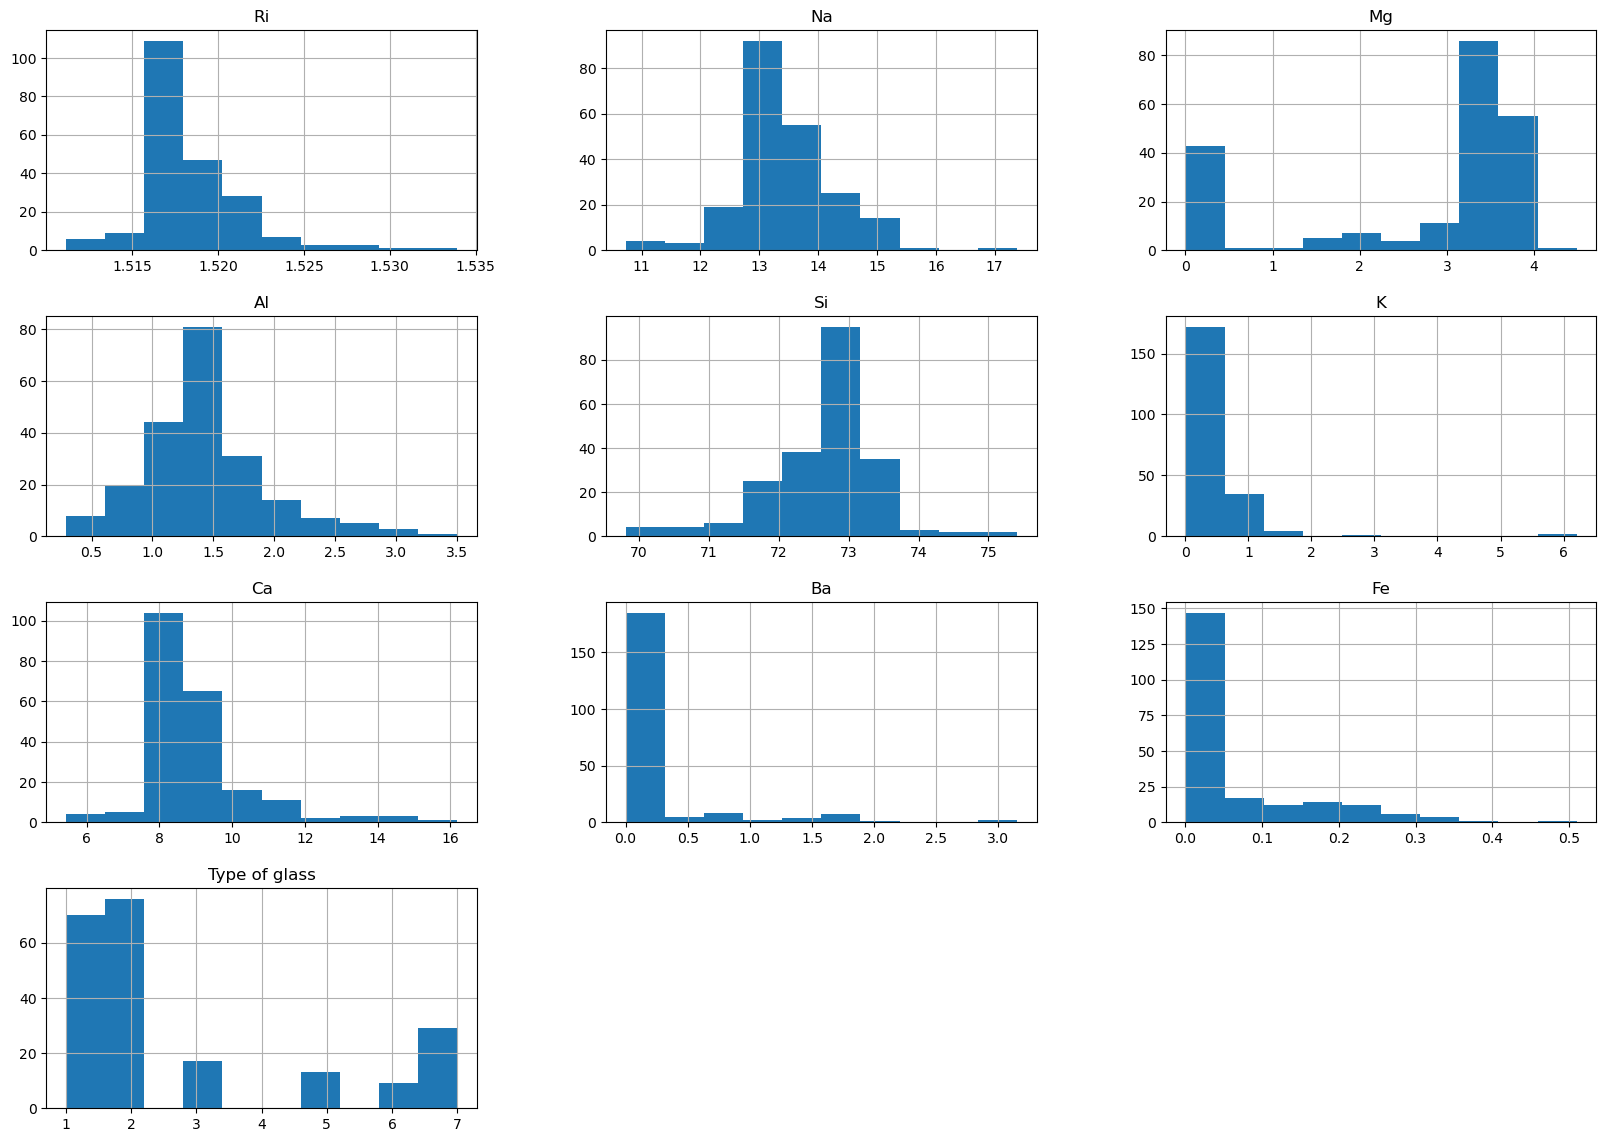

In [30]:
data.hist(figsize=(20,14))
plt.show()

<AxesSubplot:>

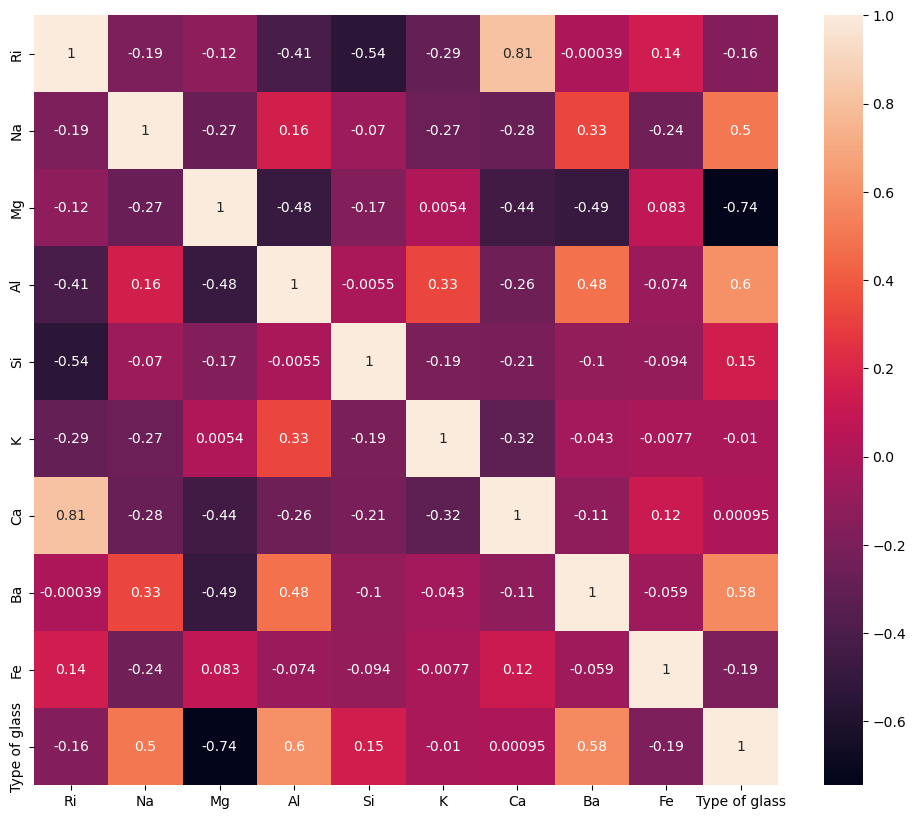

In [31]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(),annot=True)

In [32]:
data["Type of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

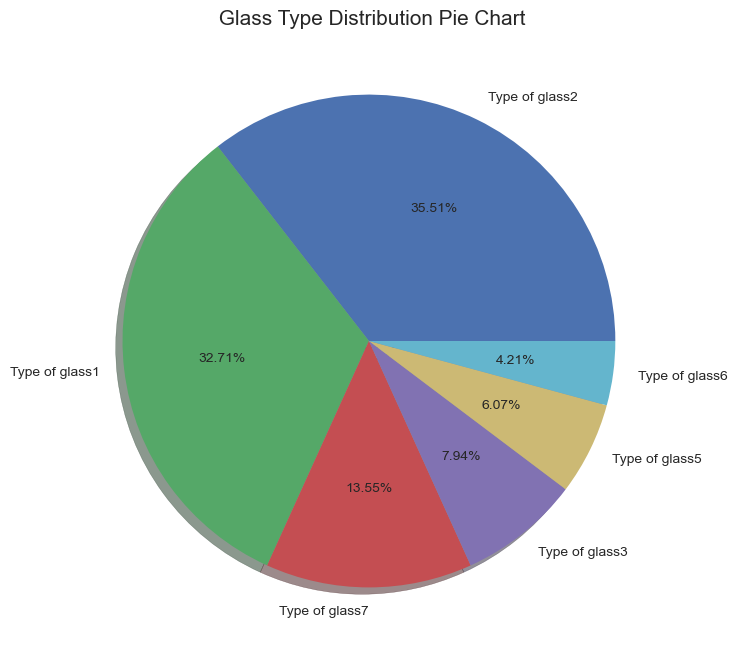

In [36]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=data["Type of glass"].value_counts(),
       labels=["Type of glass2","Type of glass1","Type of glass7","Type of glass3","Type of glass5","Type of glass6"],
       shadow=True,
       autopct="%1.2f%%",
       )
plt.title(" Glass Type Distribution Pie Chart",fontsize=15)
plt.show()

Text(0.5, 1.03, ' Glass Type Distribution Pie Chart')

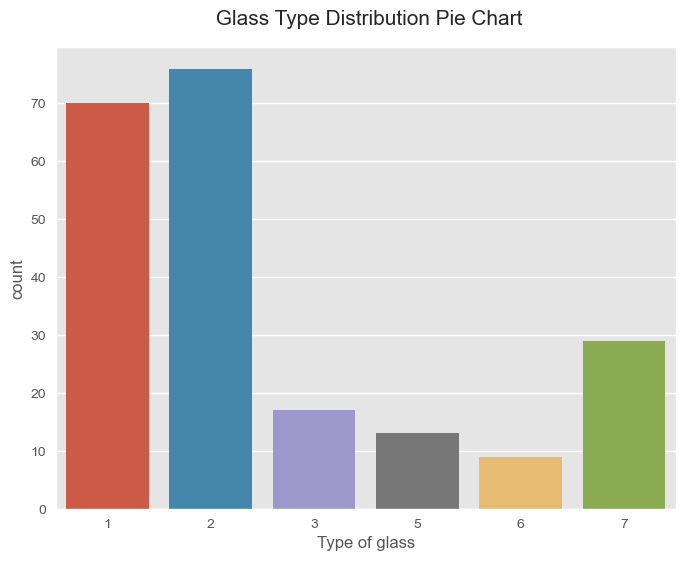

In [37]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = data["Type of glass"]);
plt.title(" Glass Type Distribution Pie Chart",fontsize=15,y=1.03)


Text(0.5, 0, 'Mg')

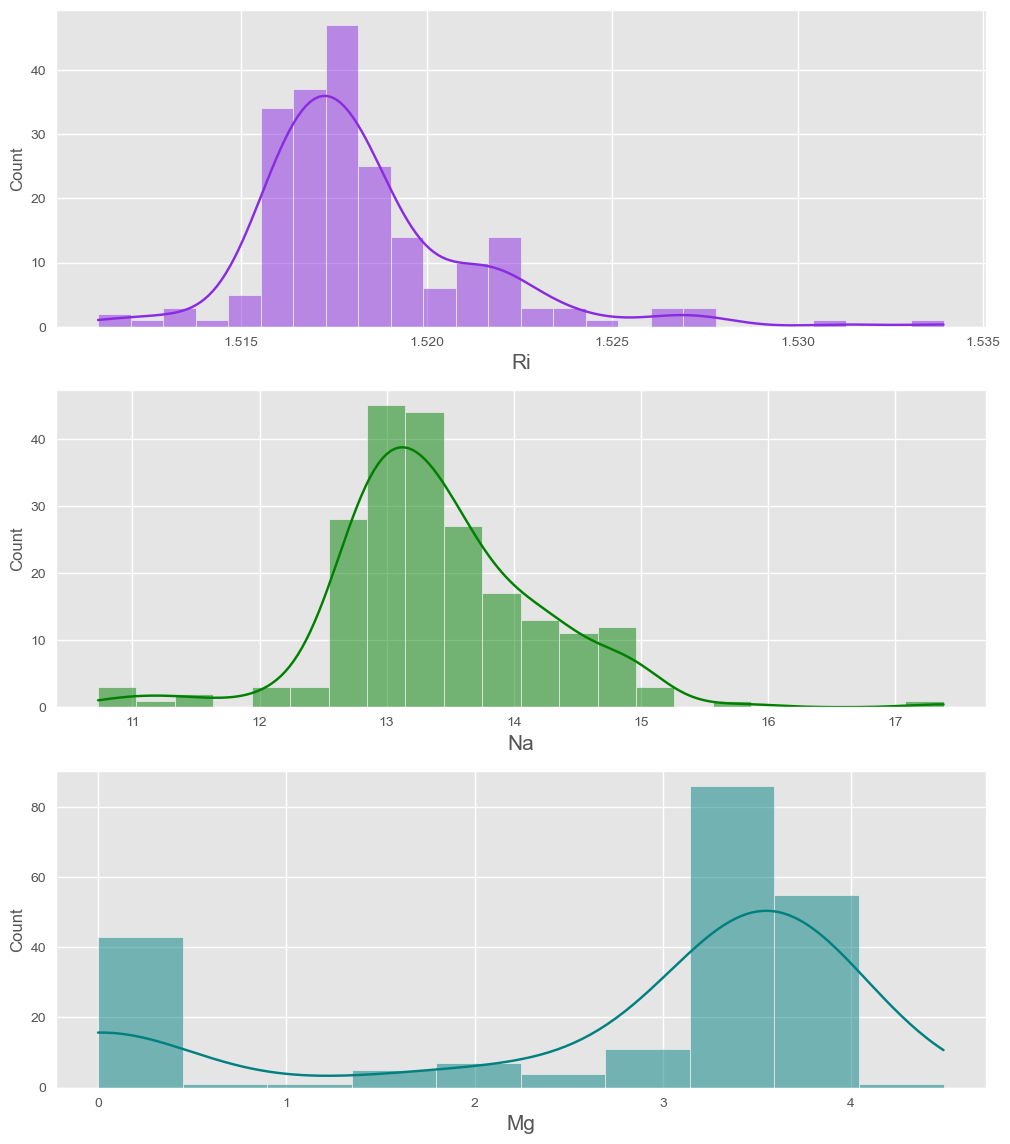

In [41]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3,1, figsize=(12,14))

sns.histplot(x = data["Ri"],kde=True, ax=ax[0], color="blueviolet");
ax[0].set_xlabel("Ri",fontsize=15);

sns.histplot(x = data["Na"], kde=True, ax=ax[1],color="green");
ax[1].set_xlabel("Na",fontsize=15);


sns.histplot(x = data["Mg"], kde=True, ax=ax[2],color="teal");
ax[2].set_xlabel("Mg",fontsize=15)


Text(0.5, 0, 'K')

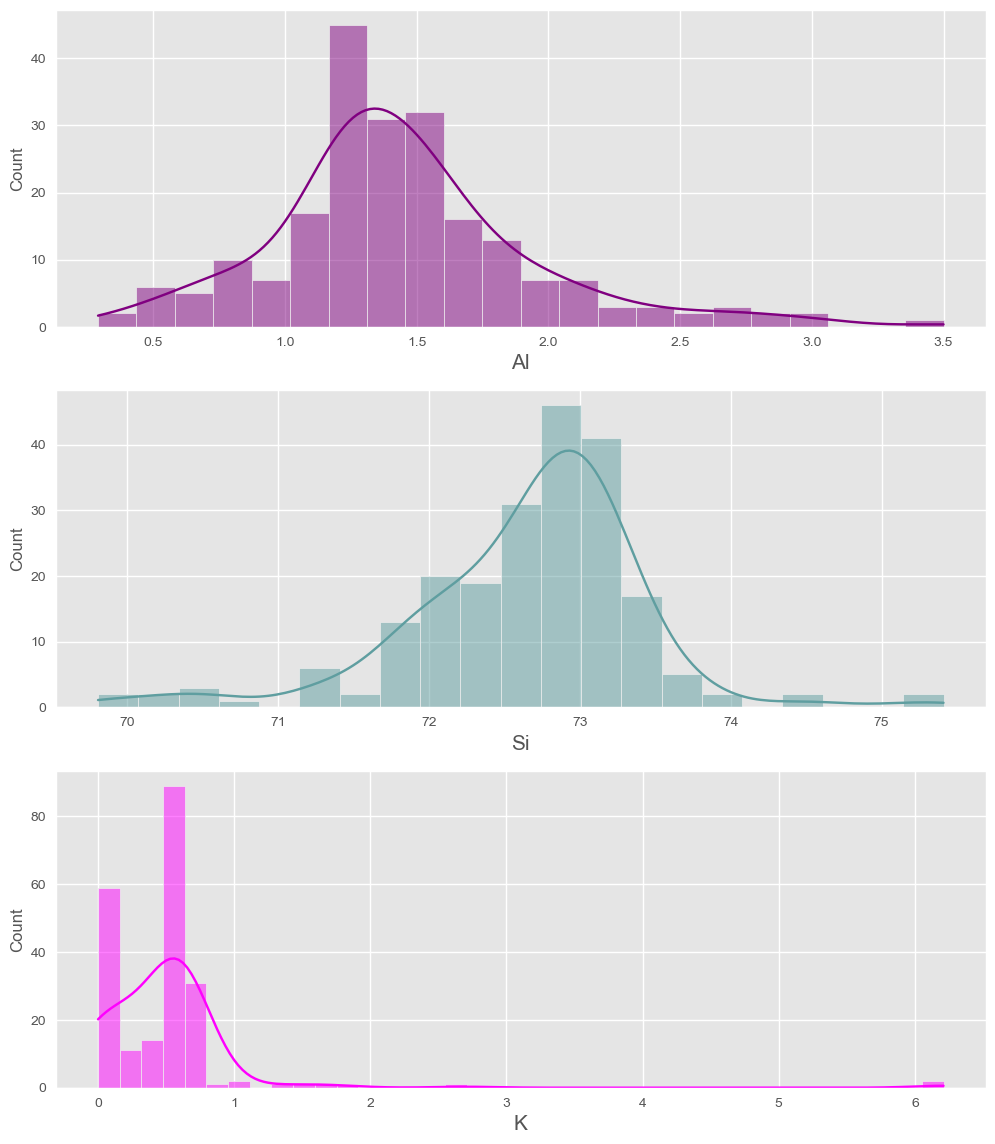

In [45]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3,1, figsize=(12,14))

sns.histplot(x = data["Al"],kde=True, ax=ax[0], color="purple");
ax[0].set_xlabel("Al",fontsize=15);

sns.histplot(x = data["Si"], kde=True, ax=ax[1],color="cadetblue");
ax[1].set_xlabel("Si",fontsize=15);


sns.histplot(x = data["K"], kde=True, ax=ax[2],color="fuchsia");
ax[2].set_xlabel("K",fontsize=15)


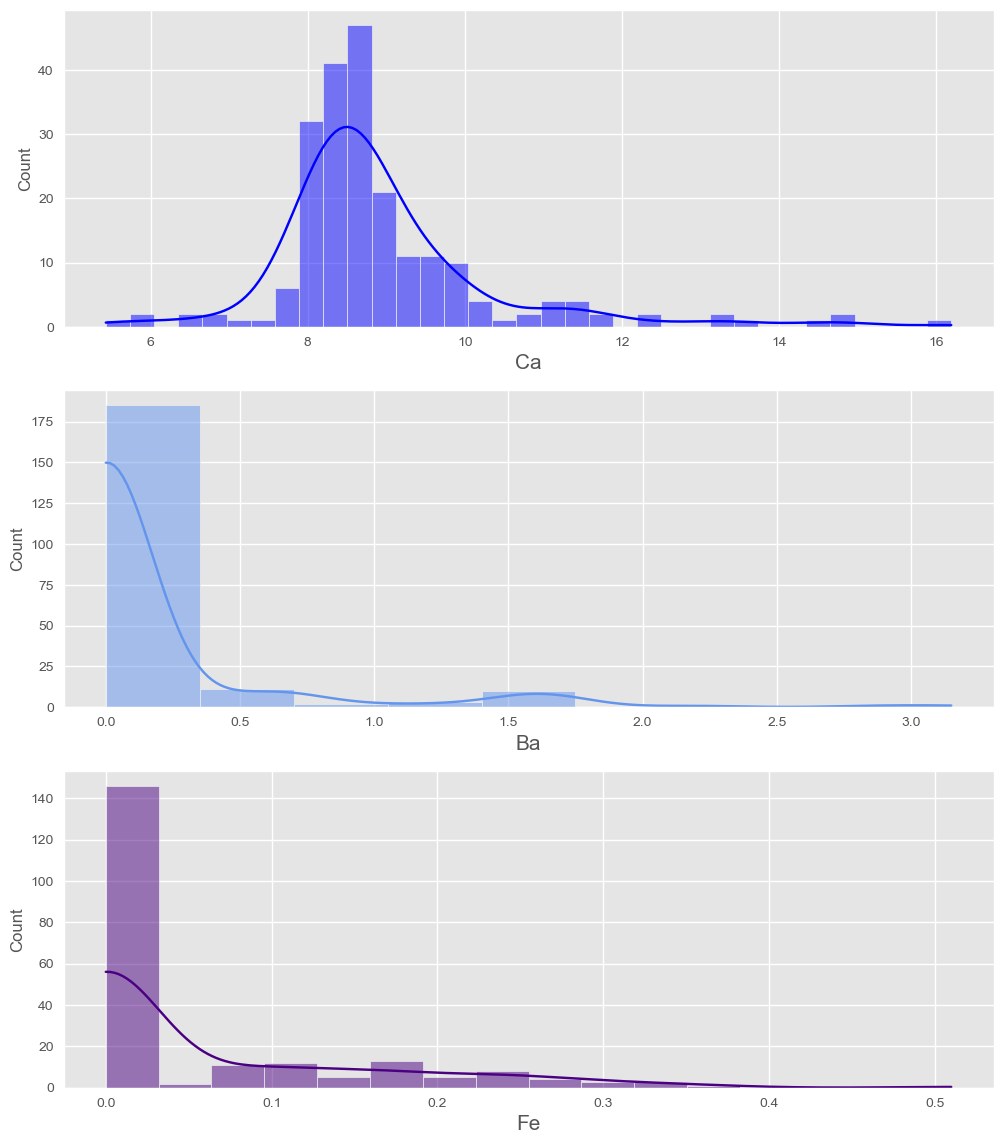

In [46]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3,1, figsize=(12,14))

sns.histplot(x = data["Ca"],kde=True, ax=ax[0], color="blue");
ax[0].set_xlabel("Ca",fontsize=15);

sns.histplot(x = data["Ba"], kde=True, ax=ax[1],color="cornflowerblue");
ax[1].set_xlabel("Ba",fontsize=15);


sns.histplot(x = data["Fe"], kde=True, ax=ax[2],color="indigo");
ax[2].set_xlabel("Fe",fontsize=15);

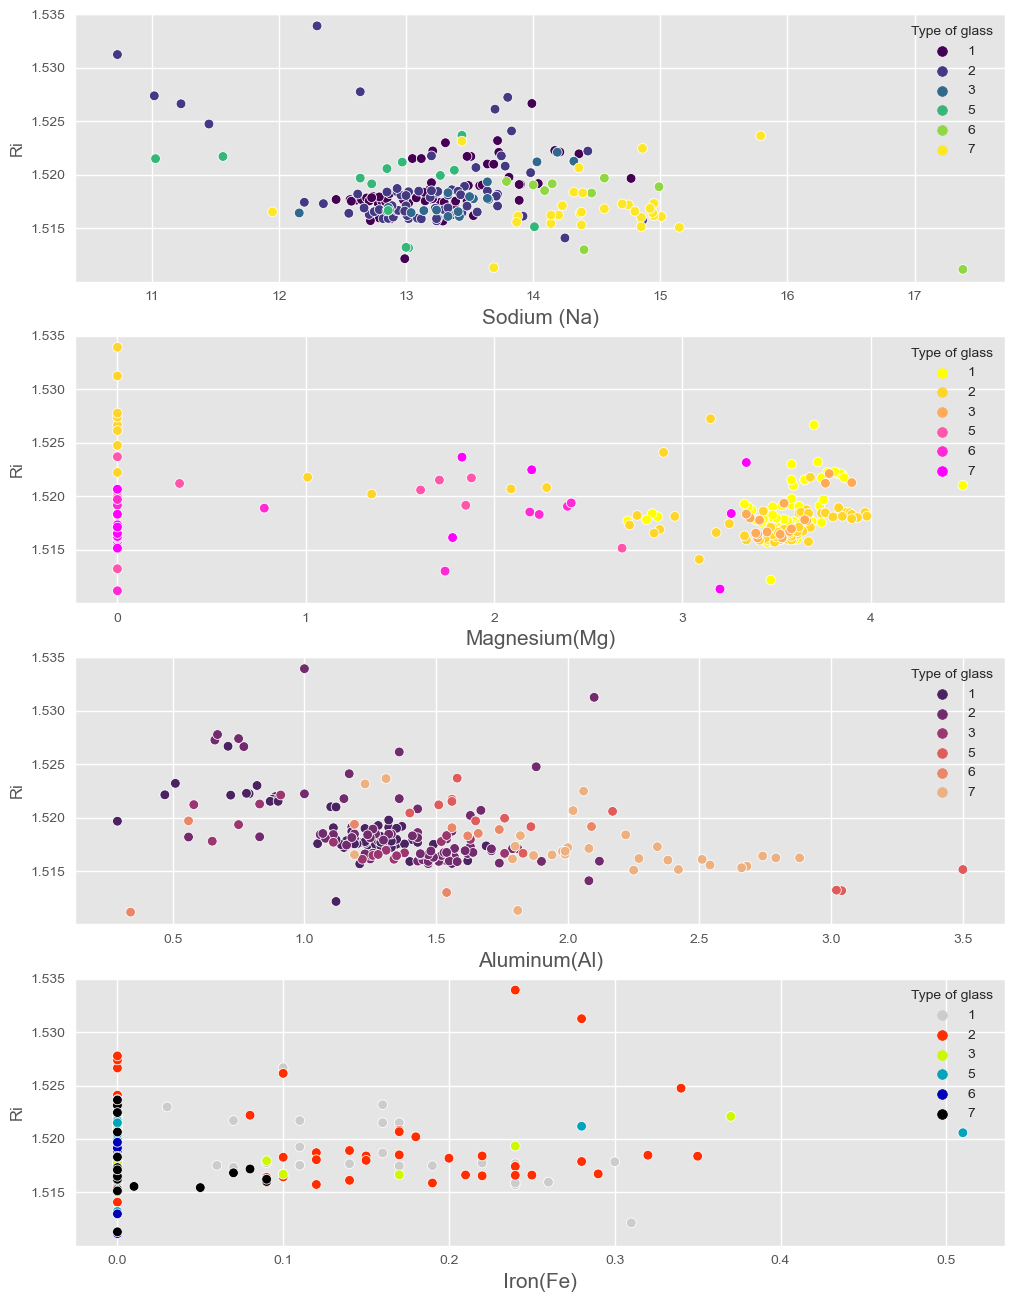

In [51]:
plt.style.use("ggplot")
fig, ax = plt.subplots(4,1, figsize=(12,16))

sns.scatterplot(x = data['Na'],y = data['Ri'], hue = data['Type of glass'], palette='viridis',legend=True, ax=ax[0])
ax[0].set_xlabel("Sodium (Na)",fontsize=15);

sns.scatterplot(x = data['Mg'],y = data['Ri'], hue = data['Type of glass'], palette='spring_r',legend=True, ax=ax[1])
ax[1].set_xlabel("Magnesium(Mg)",fontsize=15);

sns.scatterplot(x = data['Al'],y = data['Ri'], hue = data['Type of glass'], palette='flare_r',legend=True, ax=ax[2]);
ax[2].set_xlabel("Aluminum(Al)",fontsize=15);

sns.scatterplot(x = data['Fe'],y = data['Ri'], hue = data['Type of glass'], palette='nipy_spectral_r',legend=True, ax=ax[3]);
ax[3].set_xlabel("Iron(Fe)",fontsize=15);



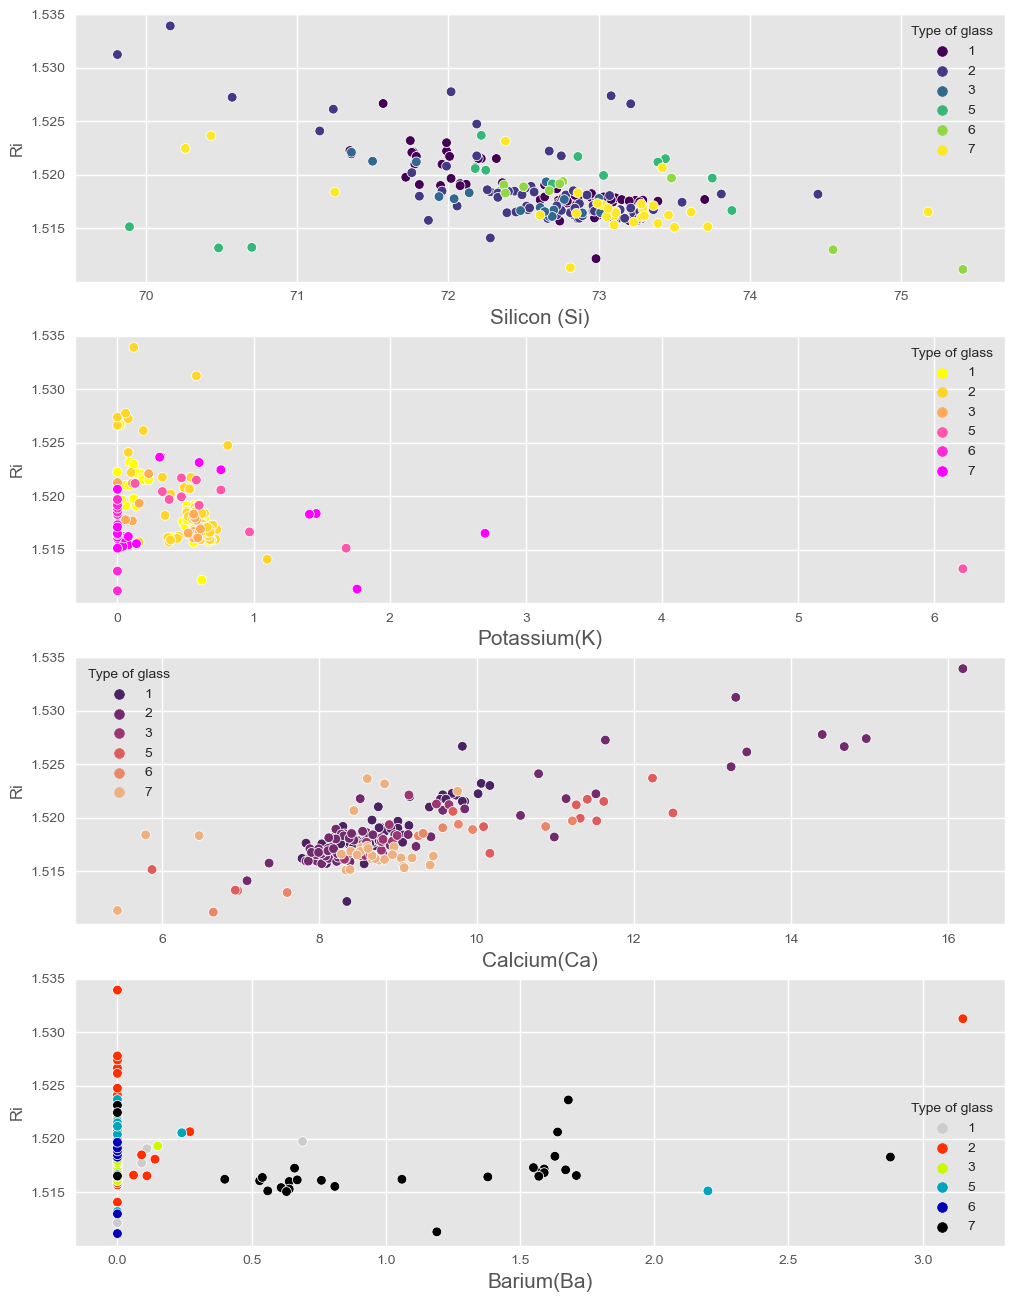

In [52]:
plt.style.use("ggplot")
fig, ax = plt.subplots(4,1, figsize=(12,16))

sns.scatterplot(x = data['Si'],y = data['Ri'], hue = data['Type of glass'], palette='viridis',legend=True, ax=ax[0])
ax[0].set_xlabel("Silicon (Si)",fontsize=15);

sns.scatterplot(x = data['K'],y = data['Ri'], hue = data['Type of glass'], palette='spring_r',legend=True, ax=ax[1])
ax[1].set_xlabel("Potassium(K)",fontsize=15);

sns.scatterplot(x = data['Ca'],y = data['Ri'], hue = data['Type of glass'], palette='flare_r',legend=True, ax=ax[2]);
ax[2].set_xlabel("Calcium(Ca)",fontsize=15);

sns.scatterplot(x = data['Ba'],y = data['Ri'], hue = data['Type of glass'], palette='nipy_spectral_r',legend=True, ax=ax[3]);
ax[3].set_xlabel("Barium(Ba)",fontsize=15);



# Splitting the data into training and test datasets

Here, we are trying to predict the glass type using given data.Hence, the Type will be the y label and rest of the data will be the x or the input data.

In [53]:
x = data.drop("Type of glass",axis=1)
x.head()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [56]:
y = data["Type of glass"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
len(x_train),len(x_test)

(149, 65)

# Model Building

# 1. Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
LinearRegressionScore = lr.score(x_test,y_test)
print("Accuracy obtained by Liner Regression model:",LinearRegressionScore*100)

Accuracy obtained by Liner Regression model: 76.64801283813283


# 2.DECLSION TREE CLASSIFIER

In [62]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
dtree = DecisionTreeClassifier(max_depth=6,random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [63]:
DecisionTreeClassifierScore=dtree.score(x_test,y_test)
print("Accuracy obtaimed by Decision tree classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtaimed by Decision tree classifier model: 66.15384615384615


# 3.Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rfc=RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
RandomForestClassifierScore=rfc.score(x_test,y_test)
print("Accuracy obtained by Random forest classifier model:",RandomForestClassifierScore*100)

Accuracy obtaimed by Random forest classifier model: 75.38461538461539


# 4.GRADIENT BOOSTING CLASSIFIER

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
GradientBoostingClassifierScore=gb.score(x_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)


Accuracy obtained by Gradient Boosting Classifier model: 80.0


# 5. Extra TreesClassifier

In [72]:
from sklearn.ensemble import  ExtraTreesClassifier
np.random.seed(42)
etc=ExtraTreesClassifier(n_estimators=100,random_state=2)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=2)

In [73]:
ExtraTreesClassifierScore=etc.score(x_test,y_test)
print("Accuracy obtained by  Extra Trees Classifier model:",  ExtraTreesClassifierScore*100)

Accuracy obtained by  Extra Trees Classifier model: 80.0


# 6. k Neighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knn=KNeighborsClassifier(4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [76]:
KNeighborsClassifierScore= knn.score(x_test,y_test)
print("Accuracy obtained by  K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by  K Neighbors Classifier model: 60.0


# 7. CatBoost Classifier

In [81]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import catboost
from catboost import CatBoostClassifier
np.random.seed(42)
cat=CatBoostClassifier(iterations=10)
cat.fit(x_train,y_train)

Learning rate set to 0.5
0:	learn: 1.4233534	total: 145ms	remaining: 1.31s
1:	learn: 1.1522712	total: 151ms	remaining: 602ms
2:	learn: 0.9846185	total: 156ms	remaining: 365ms
3:	learn: 0.8708312	total: 162ms	remaining: 243ms
4:	learn: 0.8096730	total: 167ms	remaining: 167ms
5:	learn: 0.7486508	total: 173ms	remaining: 115ms
6:	learn: 0.6821254	total: 179ms	remaining: 76.5ms
7:	learn: 0.6313458	total: 184ms	remaining: 46ms
8:	learn: 0.5730829	total: 190ms	remaining: 21.1ms
9:	learn: 0.5322829	total: 197ms	remaining: 0us


In [83]:
CatBoostClassifierScore= cat.score(x_test,y_test)
print("Accuracy obtained by  CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by  CatBoost Classifier model: 75.38461538461539


In [84]:
y_pred=gb.predict(x_test)
data = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,2
56,1,1
199,7,7


Text(0.5, 1.03, 'Model Comparison - Model Accuracy')

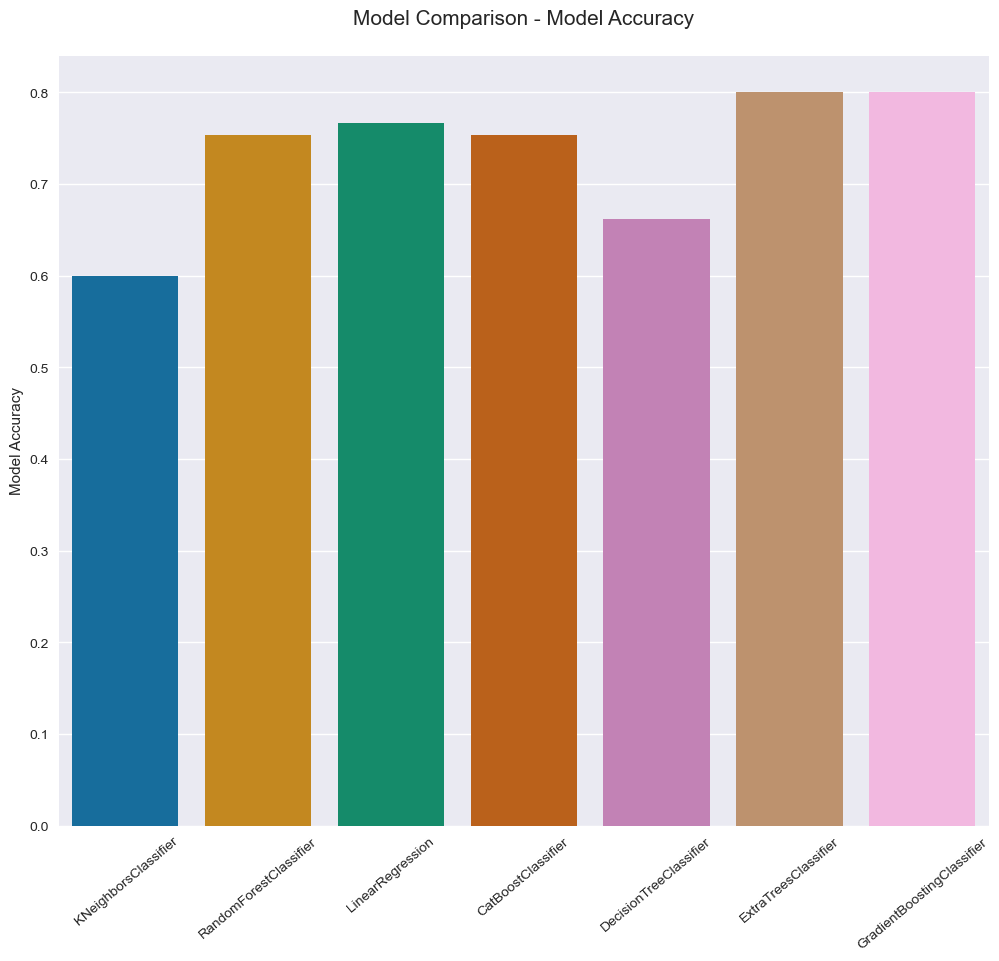

In [86]:
x = [' KNeighborsClassifier',
    'RandomForestClassifier',
    'LinearRegression',
    'CatBoostClassifier',
    'DecisionTreeClassifier',
    'ExtraTreesClassifier',
     'GradientBoostingClassifier']
y = [KNeighborsClassifierScore,
     RandomForestClassifierScore,
     LinearRegressionScore,
     CatBoostClassifierScore,
     DecisionTreeClassifierScore,
     ExtraTreesClassifierScore,
     GradientBoostingClassifierScore]

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=x,y=y, palette="colorblind");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy",fontsize=15,y=1.03)

# Conculsion:
    
Grandient Boosting Classiffer and Extra Trees ClassifierScore gave us the best accuracy of about 81% out of all models.